**Name : B. Ajay Martin Ferdinand**

**Project : Unsupervised ML - Zomato Restaurant Clustering**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/almabetter

/content/drive/My Drive/almabetter


In [ ]:
import pandas as pd
df = pd.read_csv("Zomato Restaurant names and Metadata.csv")
df

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [ ]:
df1 = pd.read_csv("Zomato Restaurant reviews.csv")
df1

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


In [ ]:
df1.isna().sum()

,0
Restaurant,0
Reviewer,38
Review,45
Rating,38
Metadata,38
Time,38
Pictures,0


In [ ]:
df.isna().sum()

,0
Name,0
Links,0
Cost,0
Collections,54
Cuisines,0
Timings,1


In [ ]:
df.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
df1.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

# Data Pre-Processing

In [ ]:
merged_df = pd.merge(df, df1, left_on='Name', right_on='Restaurant', how='left')

In [ ]:
merged_df

,Name,Links,Cost,Collections,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun),NaN,NaN,NaN,NaN,NaN,NaN,NaN


Count Restaurants with No Reviews

In [ ]:
# Count unmatched rows
no_reviews = merged_df[merged_df['Reviewer'].isna()]
print(f"Restaurants without reviews: {no_reviews.shape[0]} out of {df.shape[0]}")


Restaurants without reviews: 43 out of 105


In [ ]:
# Fill missing values for review-related columns
merged_df.fillna({'Reviewer': 'No Reviewer', 'Review': 'No Review', 'Rating': 0}, inplace=True)


In [ ]:
merged_df

,Name,Links,Cost,Collections,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM,NaN,No Reviewer,No Review,0,NaN,NaN,NaN
10001,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...",NaN,No Reviewer,No Review,0,NaN,NaN,NaN
10002,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM,NaN,No Reviewer,No Review,0,NaN,NaN,NaN
10003,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun),NaN,No Reviewer,No Review,0,NaN,NaN,NaN


Changing Data Types

In [ ]:
merged_df['Cost'] = merged_df['Cost'].str.replace('₹', '').str.replace(',', '').astype(float)

**Comparission between missing reviews and having reviews**

In [ ]:
# Extract rows with missing reviews
no_reviews_df = merged_df[merged_df['Reviewer'] == 'No Reviewer']

# Preview the no-review restaurants
print(no_reviews_df.head())


                     Name                                              Links  \
8777  American Wild Wings  https://www.zomato.com/hyderabad/american-wild...   
8778  American Wild Wings  https://www.zomato.com/hyderabad/american-wild...   
8779  American Wild Wings  https://www.zomato.com/hyderabad/american-wild...   
8780  American Wild Wings  https://www.zomato.com/hyderabad/american-wild...   
8781  American Wild Wings  https://www.zomato.com/hyderabad/american-wild...   

       Cost                                  Collections  \
8777  600.0  Food Hygiene Rated Restaurants in Hyderabad   
8778  600.0  Food Hygiene Rated Restaurants in Hyderabad   
8779  600.0  Food Hygiene Rated Restaurants in Hyderabad   
8780  600.0  Food Hygiene Rated Restaurants in Hyderabad   
8781  600.0  Food Hygiene Rated Restaurants in Hyderabad   

                                Cuisines          Timings  \
8777  American, Fast Food, Salad, Burger  12 Noon to 4 AM   
8778  American, Fast Food, Salad, Bu

In [ ]:
# Analyze cuisines for restaurants without reviews
no_review_cuisines = no_reviews_df['Cuisines'].value_counts()
print(no_review_cuisines)

# Average cost for restaurants without reviews
avg_cost_no_reviews = no_reviews_df['Cost'].mean()
print(f"Average Cost: {avg_cost_no_reviews}")


Cuisines
American, Fast Food, Salad, Burger    23
Continental                           15
Fast Food, Salad                       1
Bakery, Mithai                         1
North Indian, Biryani, Chinese         1
Fast Food                              1
Thai, Asian, Chinese, Malaysian        1
Name: count, dtype: int64
Average Cost: 954.6511627906976


**Interpretations:**


1. **Cuisine Bias:**
Certain cuisines like American, Fast Food may have restaurants that are new or less reviewed compared to other popular cuisines such as North Indian or Chinese.
2. **Cost vs Reviews:**
If the average cost for restaurants with reviews is significantly different from ₹954.65, it could indicate that cost influences the likelihood of receiving reviews.
3. **Business Implication:**
Restaurants in the "no reviews" category may need to improve visibility or customer engagement strategies, such as promotions or targeted campaigns.



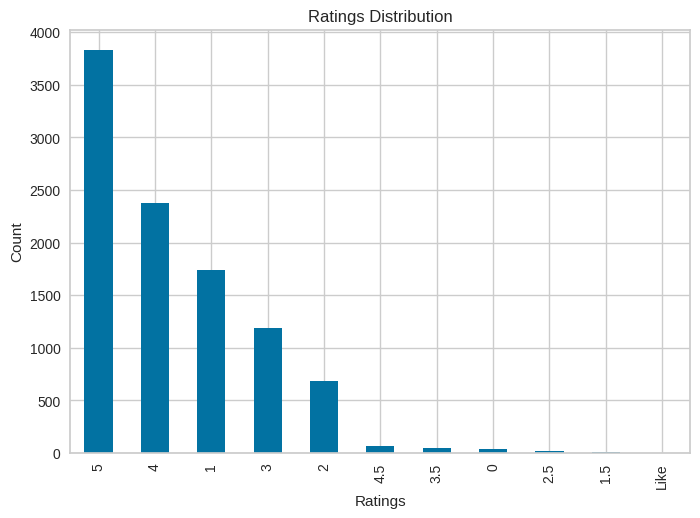

In [ ]:
import matplotlib.pyplot as plt

# Plot ratings
merged_df['Rating'].value_counts().plot(kind='bar', title='Ratings Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


In [ ]:
# Restaurants with reviews
with_reviews_df = merged_df[merged_df['Reviewer'] != 'No Reviewer']

# Average cost for restaurants with reviews
avg_cost_with_reviews = with_reviews_df['Cost'].mean()
print(f"Average Cost (with reviews): {avg_cost_with_reviews}")

# Compare cuisines
with_review_cuisines = with_reviews_df['Cuisines'].value_counts()
print(with_review_cuisines.head())


Average Cost (with reviews): 871.5318209194941
Cuisines
North Indian, Chinese                  400
North Indian                           300
South Indian, North Indian, Chinese    200
Biryani, North Indian, Chinese         200
Ice Cream, Desserts                    200
Name: count, dtype: int64


**Interpretations:**
1. Restaurants with reivews has less average price than the restaurants with no reviews.
2. This shows that due to some cost people are not wanted to give reviews.
3. Or maybe that Restaurants or not familiar with customers
4. Restaurants without reivews should promote their restaurants.

# Clustering Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
# Download VADER lexicon
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Add sentiment scores
merged_df['Sentiment_Score'] = merged_df['Review'].apply(
    lambda x: sid.polarity_scores(str(x))['compound'] if pd.notna(x) else 0
)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Aggregate metrics
sentiment_summary = merged_df.groupby('Name').agg({
    'Sentiment_Score': 'mean',  # Average sentiment score
    'Reviewer': 'count',        # Total number of reviews
    'Rating': lambda x: pd.to_numeric(x, errors='coerce').mean() # Average rating, handle non-numeric values
}).reset_index().rename(columns={'Reviewer': 'Total_Reviews'})

# Merge sentiment metrics back into metadata
cluster_data = pd.merge(df, sentiment_summary, on='Name', how='left')

# Fill missing values for restaurants without reviews
cluster_data['Sentiment_Score'] = cluster_data['Sentiment_Score'].fillna(0)  # Neutral sentiment
cluster_data['Total_Reviews'] = cluster_data['Total_Reviews'].fillna(0)     # No reviews
cluster_data['Rating'] = cluster_data['Rating'].fillna(cluster_data['Rating'].mean())  # Replace missing ratings with the mean

# Convert 'Cost' to numeric before filling NaN
cluster_data['Cost'] = pd.to_numeric(cluster_data['Cost'].str.replace('₹', '').str.replace(',', ''), errors='coerce')
# Now fill missing costs with the median
cluster_data['Cost'] = cluster_data['Cost'].fillna(cluster_data['Cost'].median())  # Replace missing costs with the median

In [ ]:
# Features for clustering
features = cluster_data[['Cost', 'Sentiment_Score', 'Rating', 'Total_Reviews']]


In [ ]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

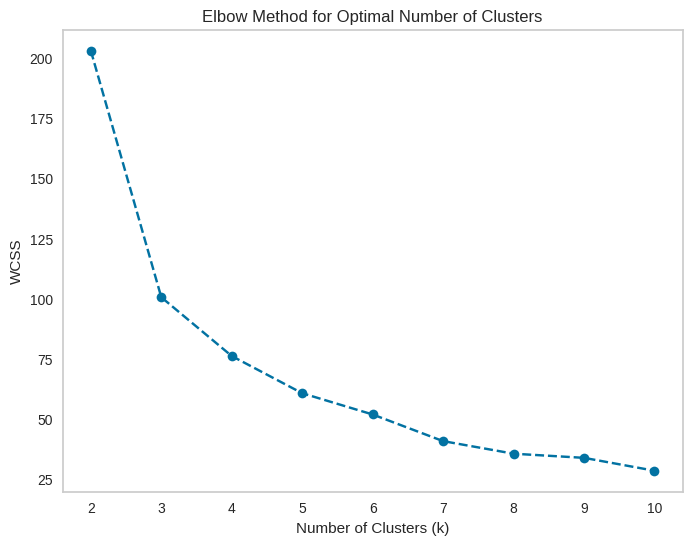

In [ ]:
# Calculate WCSS for different numbers of clusters
wcss = []
for k in range(2, 11):  # Test cluster sizes from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(2, 11))
plt.grid()
plt.show()


For n_clusters = 2, silhouette score is 0.7520469667254022


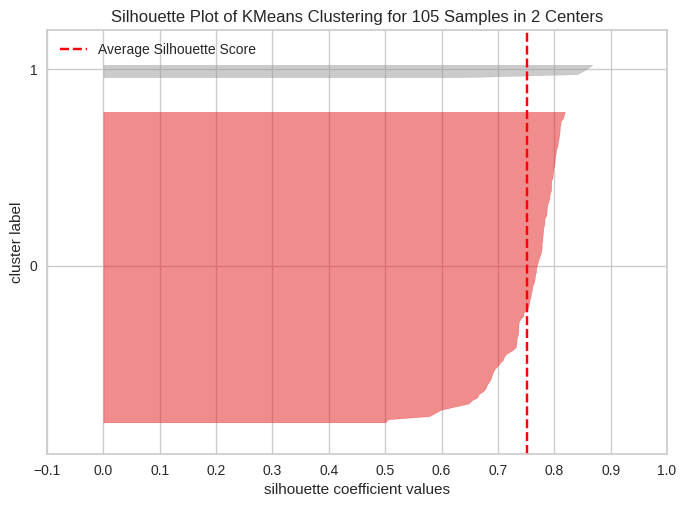

For n_clusters = 3, silhouette score is 0.45915547319511135


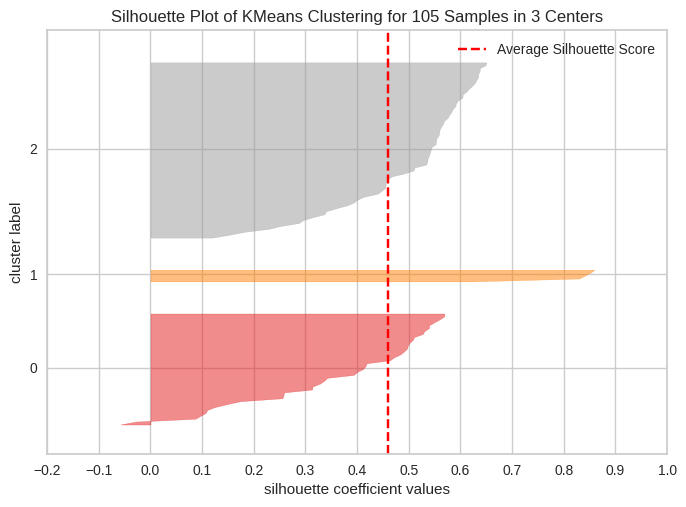

For n_clusters = 4, silhouette score is 0.3509487645376092


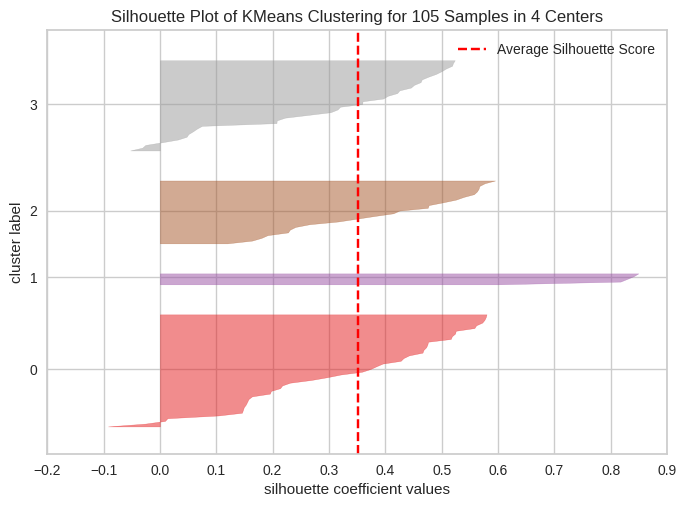

For n_clusters = 5, silhouette score is 0.32701236181121895


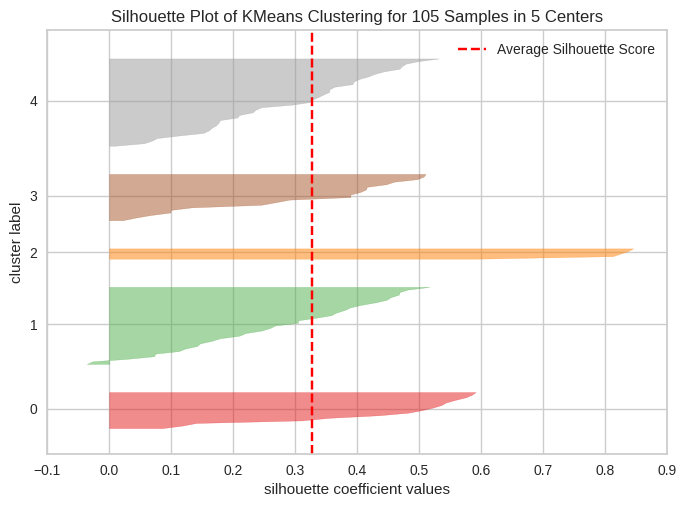

For n_clusters = 6, silhouette score is 0.38123198187171276


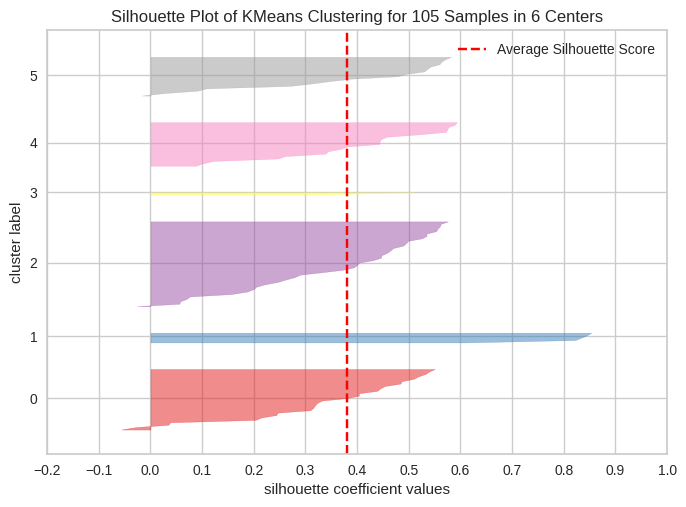

For n_clusters = 7, silhouette score is 0.3674362854408169


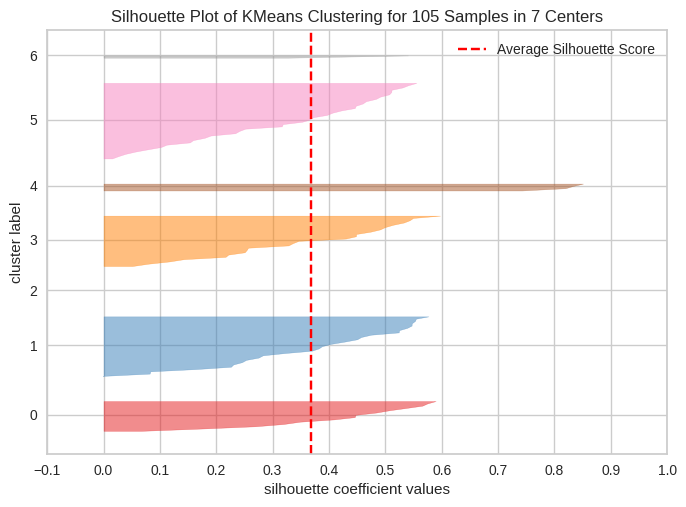

For n_clusters = 8, silhouette score is 0.3328928908996258


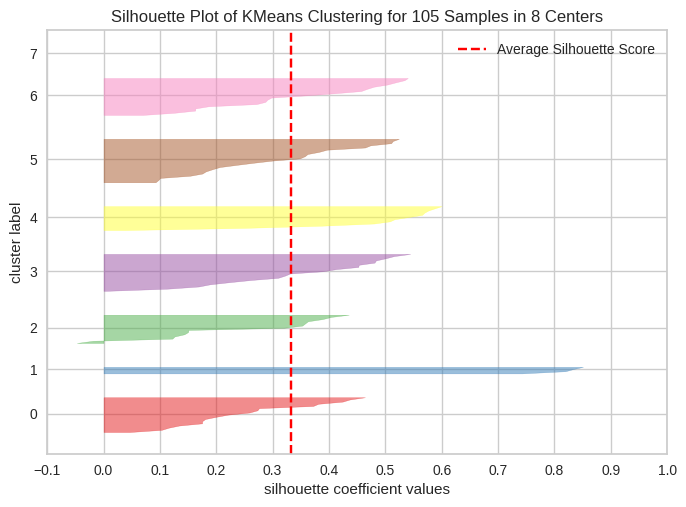

For n_clusters = 9, silhouette score is 0.3533166328281767


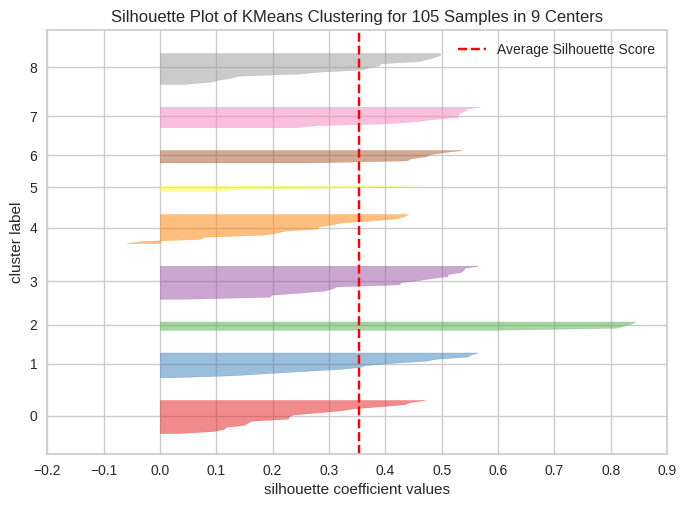

For n_clusters = 10, silhouette score is 0.35155409266252163


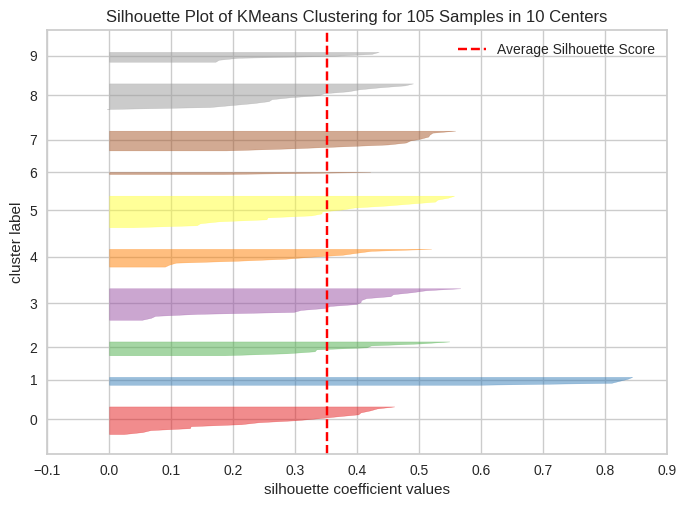

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score


for n_clusters in range(2,11):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(scaled_features)
    centers = km.cluster_centers_

    score = silhouette_score(scaled_features, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(scaled_features)
    visualizer.poof()

In [ ]:
# Apply K-Means with the optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(scaled_features)


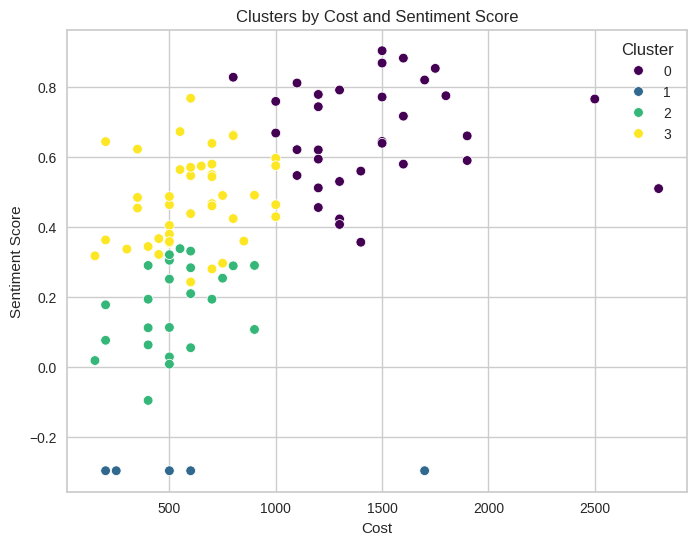

In [ ]:
# Scatter plot for Cost vs. Sentiment Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cluster_data, x='Cost', y='Sentiment_Score', hue='Cluster', palette='viridis')
plt.title('Clusters by Cost and Sentiment Score')
plt.xlabel('Cost')
plt.ylabel('Sentiment Score')
plt.legend(title='Cluster')
plt.show()


**Clusters by Cost and Sentiment Score**
Interpretation:
* Restaurants with higher costs tend to have a higher sentiment score.
* Lower-cost restaurants show a mix of sentiment scores, with some having very low sentiment scores.
* The clusters (e.g., 0, 1, 2, 3) seem to segregate effectively based on cost and sentiment, reflecting varying levels of customer satisfaction or perceptions.

**Cluster Characteristics:**
* Cluster 0 likely represents restaurants with very low sentiment and possibly low cost.
* Cluster 3 might represent restaurants with moderate cost but higher sentiment scores.
* Cluster 1 includes restaurants with higher costs and consistently higher sentiment.

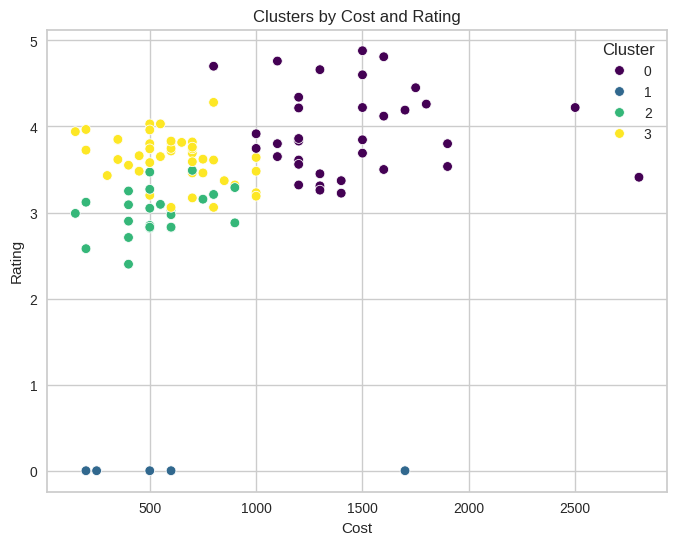

In [ ]:
# Scatter plot for Cost vs. Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cluster_data, x='Cost', y='Rating', hue='Cluster', palette='viridis')
plt.title('Clusters by Cost and Rating')
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.show()


**Clusters by Cost and Rating**
Interpretation:
* Higher-cost restaurants tend to have higher ratings, but not exclusively.

* There are high-cost restaurants with moderate ratings.
* Lower-cost restaurants again show mixed ratings, indicating variability in quality perception.
* The clustering separates these variations well, showing distinct groupings based on cost and customer ratings.

**Cluster Characteristics:**
* Cluster 0 seems to include restaurants with very low ratings and low cost.
* Cluster 3 appears to capture mid-cost restaurants with strong ratings.
* Cluster 1 likely represents high-cost, high-rating restaurants.

**K-Means Model Interpretation:**

How this interpretation be useful for Restaurant Owners and Customers:

The clustering insights can be incredibly useful for various stakeholders, such as restaurant owners, customers, and marketing teams. Here's how these analyses can be applied:

**For Restaurant Owners**
1. Understanding Market Position:
 * Identify where their restaurant falls among competitors (e.g., high-cost, high-sentiment cluster vs. low-cost, low-rating cluster).
 * Understand their target customer demographic based on cost, sentiment, and ratings.

2. Improvement Opportunities:
 * Restaurants with low ratings can identify potential weaknesses like pricing mismatch or food quality issues.

3. Strategic Pricing:
 * Owners can align pricing strategies with clusters to compete better (e.g., lower cost to attract budget-conscious customers or raise it to appeal to premium-seekers).

**For Customers**
1. Restaurant Recommendations:
 * Customers seeking high-value restaurants can look at clusters with high ratings but moderate costs.
 * Customers looking for premium experiences can choose from high-cost, high-rating clusters.

**For Marketing Teams**
1. Targeted Advertising:
 * Design campaigns tailored to different clusters. For instance:
 * Premium restaurants (high-cost, high-rating clusters) could target luxury-seekers.
 * Budget restaurants (low-cost, moderate-rating clusters) could appeal to students or budget-conscious families.
2. Customized Promotions:
 * Offer discounts or promotions to clusters with low sentiment to attract more customers or improve perceptions.

**DBSCAN Algorithm**

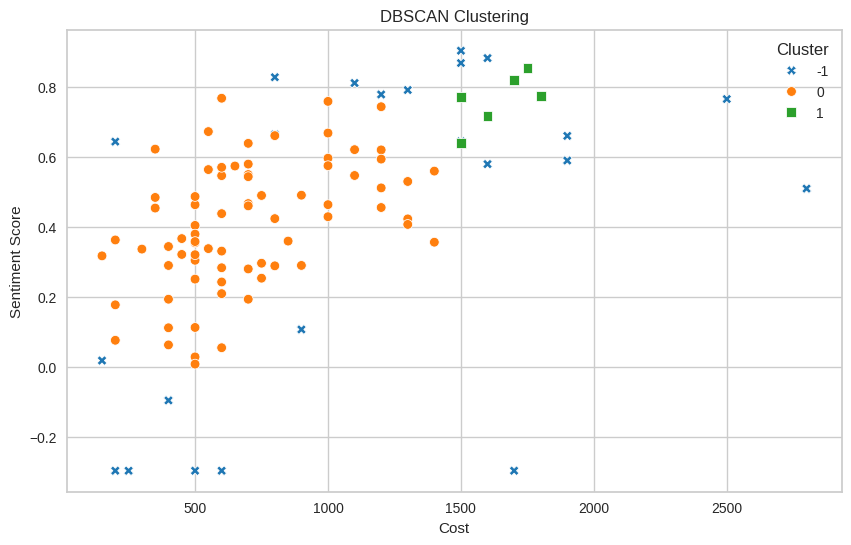

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

cluster_data['Cluster_DBSCAN'] = clusters  # Assign to cluster_data

# Step 3: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Cost',
    y='Sentiment_Score',
    hue='Cluster_DBSCAN',
    data=cluster_data,
    palette='tab10',
    style='Cluster_DBSCAN',
    markers={-1: 'X', 0: 'o', 1: 's', 2: 'D'},  # Define markers for each cluster including noise
)
plt.title('DBSCAN Clustering')
plt.xlabel('Cost')
plt.ylabel('Sentiment Score')
plt.legend(title='Cluster')
plt.show()


Plot 1: Sentiment Score vs. Cost
1. Axes:

 * X-axis: Cost (likely a monetary value for a product or service).
 * Y-axis: Sentiment Score (a measure of positive/negative sentiment, possibly derived from text analysis).

2. Clusters:

 * Cluster 0 (orange dots): Represents a group of data points with a cost range below 1500 and a wide range of positive sentiment scores (0.1 to 0.8).
 * Cluster 1 (green squares): Concentrated around a higher cost (1500 to 2000) with relatively high sentiment scores (0.5 to 0.8).
 * Noise (-1, blue crosses): Points identified as outliers. These are scattered across the plot, often at low or high costs and extreme sentiment scores (very low or high).
3. Observations:

 * Cluster 0 likely represents affordable products/services with varied sentiment.
 * Cluster 1 seems to represent higher-cost items with generally positive sentiment.
 * Noise points may be exceptional cases or anomalies, such as very expensive items with low sentiment scores.

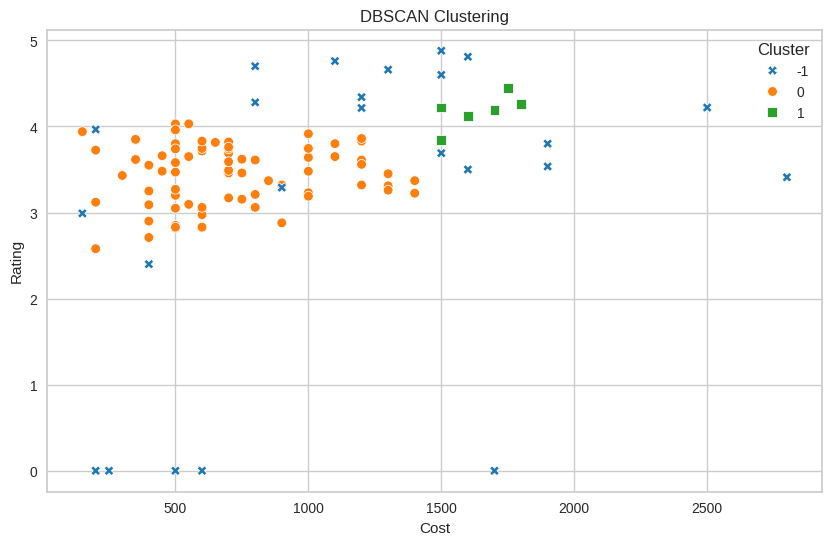

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Cost',
    y='Rating',
    hue='Cluster_DBSCAN',
    data=cluster_data,
    palette='tab10',
    style='Cluster_DBSCAN',
    markers={-1: 'X', 0: 'o', 1: 's', 2: 'D'},  # Define markers for each cluster including noise
)
plt.title('DBSCAN Clustering')
plt.xlabel('Cost')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.show()


Plot 2: Rating vs. Cost
1. Axes:

 * X-axis: Cost (same as in Plot 1).
 * Y-axis: Rating (likely a numerical value, e.g., customer reviews, on a 5-point scale).
2. Clusters:

 * Cluster 0 (orange dots): Includes products/services with costs below ~1500 and ratings clustered around 3–4.
 * Cluster 1 (green squares): Includes higher-cost items (1500 to 2000) with ratings mostly above 4.
 * Noise (-1, blue crosses): These points have either very low ratings (close to 0) or are very high-cost items outside the main clusters.
3. Observations:

 *  Cluster 0 suggests that moderately priced items receive average ratings (3–4).
 * Cluster 1 indicates that high-cost items often receive high ratings (4–5).
 * Noise points may include products that are either poorly rated or exceptionally expensive.

**DBSCAN Interpretation**

### **For Restaurants**:  
- **Optimize Pricing**: Identify which dishes are worth pricing higher or need improvement.  
- **Promote Favorites**: Focus on high-cost, high-rating items to attract premium customers.  
- **Fix Weak Spots**: Address poorly rated dishes (noise points) or remove them.  

### **For Customers**:  
- **Find Value**: Choose affordable, high-rated dishes from Cluster 0.  
- **Pick Premium**: Go for high-rated, pricier options in Cluster 1 for quality experiences.  
- **Avoid Pitfalls**: Steer clear of outliers with low ratings and high costs.  

Both groups can use these insights to enhance their dining experience!